In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [2]:
diabetes_database=pd.read_csv('diabetes.csv')

In [3]:
diabetes_database.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_database.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_database['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
diabetes_database.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
X=diabetes_database.drop(columns='Outcome',axis=1)
Y=diabetes_database['Outcome']
df=X

In [8]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [9]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(X)

StandardScaler()

In [12]:
Standardized_data=scaler.transform(X)

In [13]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X=Standardized_data
Y=diabetes_database['Outcome']

In [15]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Support Vector Machine- Support Vector Classifier

In [18]:
svmclassifier=svm.SVC(kernel = 'linear', random_state = 0)

In [19]:
svmclassifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [20]:
X_train_Prediction=svmclassifier.predict(X_train)

In [21]:
training_data_accuracy=accuracy_score(X_train_Prediction,Y_train)

In [22]:
print('Accuracy Score on training data is', training_data_accuracy)

Accuracy Score on training data is 0.7866449511400652


In [23]:
X_test_Prediction=svmclassifier.predict(X_test)

In [24]:
testing_data_accuracy=accuracy_score(X_test_Prediction,Y_test)

In [25]:
print('Accuracy Score on training data is', testing_data_accuracy)

Accuracy Score on training data is 0.7727272727272727


In [26]:
input_data=(5,300,74,0,0,25.6,0.201,30)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
                         
prediction_svm = svmclassifier.predict(std_data)

print(prediction_svm)

if(prediction_svm[0]==0):
    print("The patient does not have diabetes")
else:
    print("The person has got diabetes")

[1]
The person has got diabetes


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# DECISION TREE

In [27]:
dtclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  

In [28]:
dtclassifier.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
X_train_Prediction_dt=dtclassifier.predict(X_train)

In [30]:
training_data_accuracy_dt=accuracy_score(X_train_Prediction_dt,Y_train)

In [31]:
print('Accuracy Score on training data is', training_data_accuracy_dt)

Accuracy Score on training data is 1.0


In [32]:
X_test_Prediction_dt=dtclassifier.predict(X_test)

In [33]:
testing_data_accuracy_dt=accuracy_score(X_test_Prediction_dt,Y_test)

In [34]:
print('Accuracy Score on training data is', testing_data_accuracy_dt)

Accuracy Score on training data is 0.7142857142857143


In [35]:
input_data=(5,300,74,0,0,25.6,0.201,30)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
                         
prediction_dt = dtclassifier.predict(std_data)

print(prediction_dt)

if(prediction_dt[0]==0):
    print("The patient does not have diabetes")
else:
    print("The person has got diabetes")

[1]
The person has got diabetes


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# NAIVE BAYES

In [36]:
nb_classifier = GaussianNB()  
nb_classifier.fit(X_train, Y_train)  
X_train_Prediction_nb=nb_classifier.predict(X_train)
training_data_accuracy_nb=accuracy_score(X_train_Prediction_nb,Y_train)
print('Accuracy Score on training data is', training_data_accuracy_nb)
X_test_Prediction_nb=nb_classifier.predict(X_test)
testing_data_accuracy_nb=accuracy_score(X_test_Prediction_nb,Y_test)
print('Accuracy Score on training data is', testing_data_accuracy_nb)

Accuracy Score on training data is 0.755700325732899
Accuracy Score on training data is 0.7727272727272727


In [37]:
prediction_nb = nb_classifier.predict(std_data)
print(prediction_nb)
if(prediction_nb[0]==0):
    print("The patient does not have diabetes")
else:
    print("The person has got diabetes")

[1]
The person has got diabetes


# KNN

In [38]:
knn_classifier =KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
knn_classifier.fit(X_train, Y_train)  
X_train_Prediction_knn= knn_classifier.predict(X_train)
training_data_accuracy_knn=accuracy_score(X_train_Prediction_knn,Y_train)
print('Accuracy Score on training data is', training_data_accuracy_knn)
X_test_Prediction_knn=knn_classifier.predict(X_test)
testing_data_accuracy_knn=accuracy_score(X_test_Prediction_knn,Y_test)
print('Accuracy Score on training data is', testing_data_accuracy_knn)

Accuracy Score on training data is 0.8289902280130294
Accuracy Score on training data is 0.7207792207792207


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [39]:
prediction_knn = knn_classifier.predict(std_data)
print(prediction_knn)
if(prediction_knn[0]==0):
    print("The patient does not have diabetes")
else:
    print("The person has got diabetes")

[1]
The person has got diabetes


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# RANDOM FOREST

In [40]:
rf_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_classifier.fit(X_train, Y_train)  
X_train_Prediction_rf= rf_classifier.predict(X_train)
training_data_accuracy_rf=accuracy_score(X_train_Prediction_rf,Y_train)
print('Accuracy Score on training data is', training_data_accuracy_rf)
X_test_Prediction_rf=rf_classifier.predict(X_test)
testing_data_accuracy_rf=accuracy_score(X_test_Prediction_rf,Y_test)
print('Accuracy Score on training data is', testing_data_accuracy_rf)

Accuracy Score on training data is 0.9837133550488599
Accuracy Score on training data is 0.7207792207792207


In [41]:
prediction_rf = rf_classifier.predict(std_data)
print(prediction_rf)
if(prediction_rf[0]==0):
    print("The patient does not have diabetes")
else:
    print("The person has got diabetes")

[0]
The patient does not have diabetes


# LOGISTIC REGRESSION

In [42]:
lr_classifier= LogisticRegression(random_state=0)  
lr_classifier.fit(X_train, Y_train)  
X_train_Prediction_lr= lr_classifier.predict(X_train)
training_data_accuracy_lr=accuracy_score(X_train_Prediction_lr,Y_train)
print('Accuracy Score on training data is', training_data_accuracy_lr)
X_test_Prediction_lr=lr_classifier.predict(X_test)
testing_data_accuracy_lr=accuracy_score(X_test_Prediction_lr,Y_test)
print('Accuracy Score on training data is', testing_data_accuracy_lr)

Accuracy Score on training data is 0.7850162866449512
Accuracy Score on training data is 0.7597402597402597


In [43]:
prediction_lr = lr_classifier.predict(std_data)
print(prediction_lr)
if(prediction_lr[0]==0):
    print("The patient does not have diabetes")
else:
    print("The person has got diabetes")

[1]
The person has got diabetes


# GRAPH

,Mean Value,Models
0,72.583333,LogisticRegression
1,67.791667,DecisionTreeClassifier
2,73.958333,SVC
3,72.916667,RandomForestClassifier
4,72.125000,KNeighborsClassifier
5,70.666667,NaiveBayes


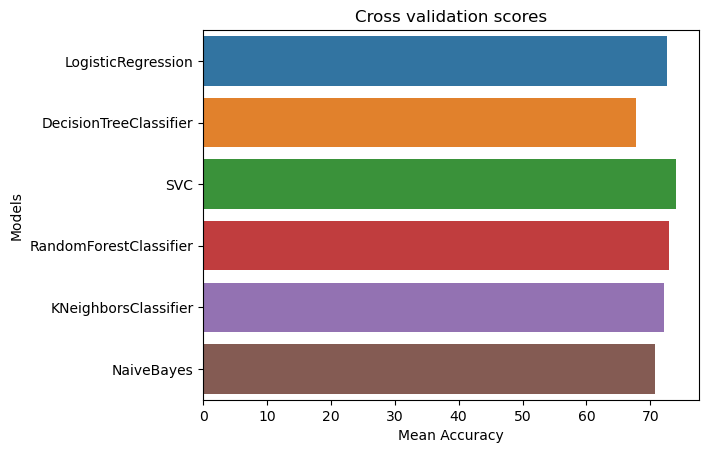

In [77]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = X_test, y = Y_test, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean()*100)
        

    result_df = pd.DataFrame({
        "Mean Value":cv_means,
        
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "SVC",
            "RandomForestClassifier",
            "KNeighborsClassifier",
            "NaiveBayes"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Mean Value", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

# Modeling step Test differents algorithms 
random_state = 10
models = [
    LogisticRegression(random_state = 0),
    DecisionTreeClassifier(criterion='entropy', random_state=0) ,
    SVC(),
    RandomForestClassifier(n_estimators= 10, criterion="entropy"),
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    GaussianNB(),
]
evaluate_model(models)